In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
from sklearn.model_selection import train_test_split

from traffic import load_data as ld

In [51]:
train_ds = keras.utils.image_dataset_from_directory(
    '../gtsrb-small-jpeg/',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(30, 30)
)

Found 840 files belonging to 3 classes.
Using 672 files for training.


In [33]:
val_ds = keras.utils.image_dataset_from_directory(
    '../gtsrb-small-jpeg/',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(30, 30)
)

Found 840 files belonging to 3 classes.
Using 168 files for validation.


In [7]:
class_names = train_ds.class_names
class_names

['0', '1', '2']

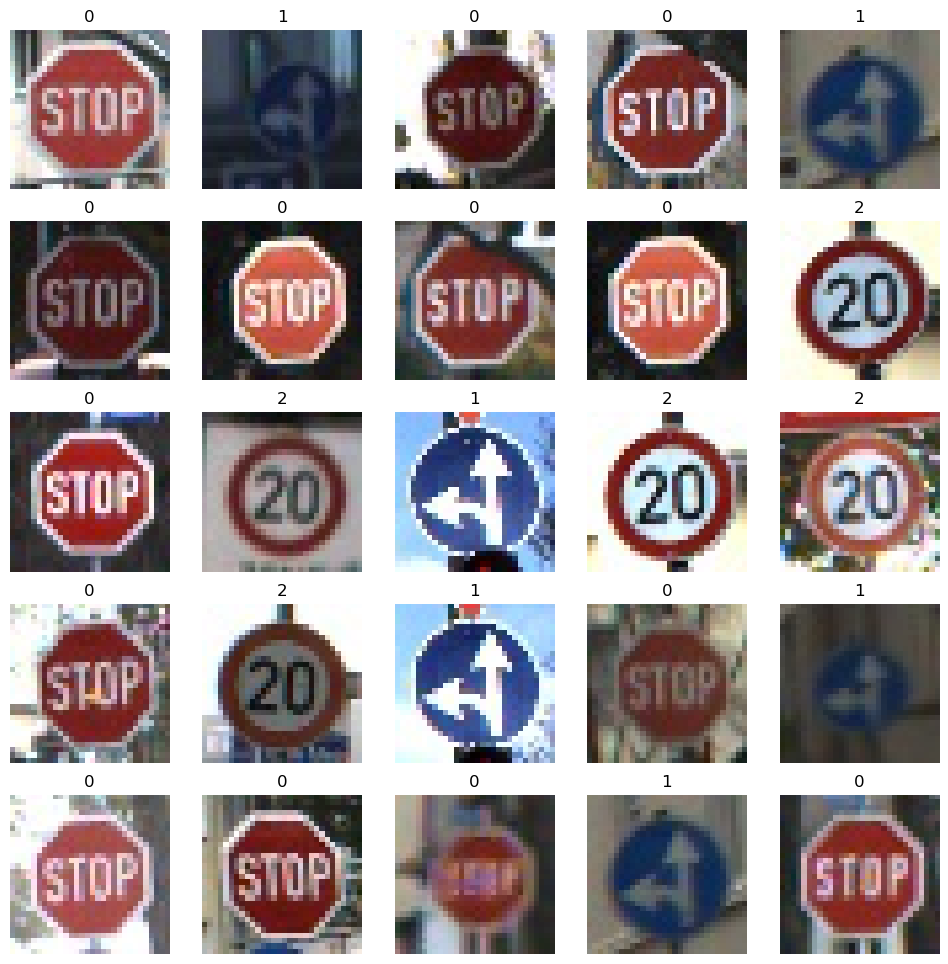

In [37]:
plt.figure(figsize=(12,12))
for images, labels in train_ds.take(2):
    for i in range(25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        

In [97]:
loaded_data = ld('../gtsrb/')

In [23]:
loaded_images = loaded_data[0][0:-1:40]
loaded_labels = loaded_data[1][0:-1:40]
print(len(loaded_images))

666


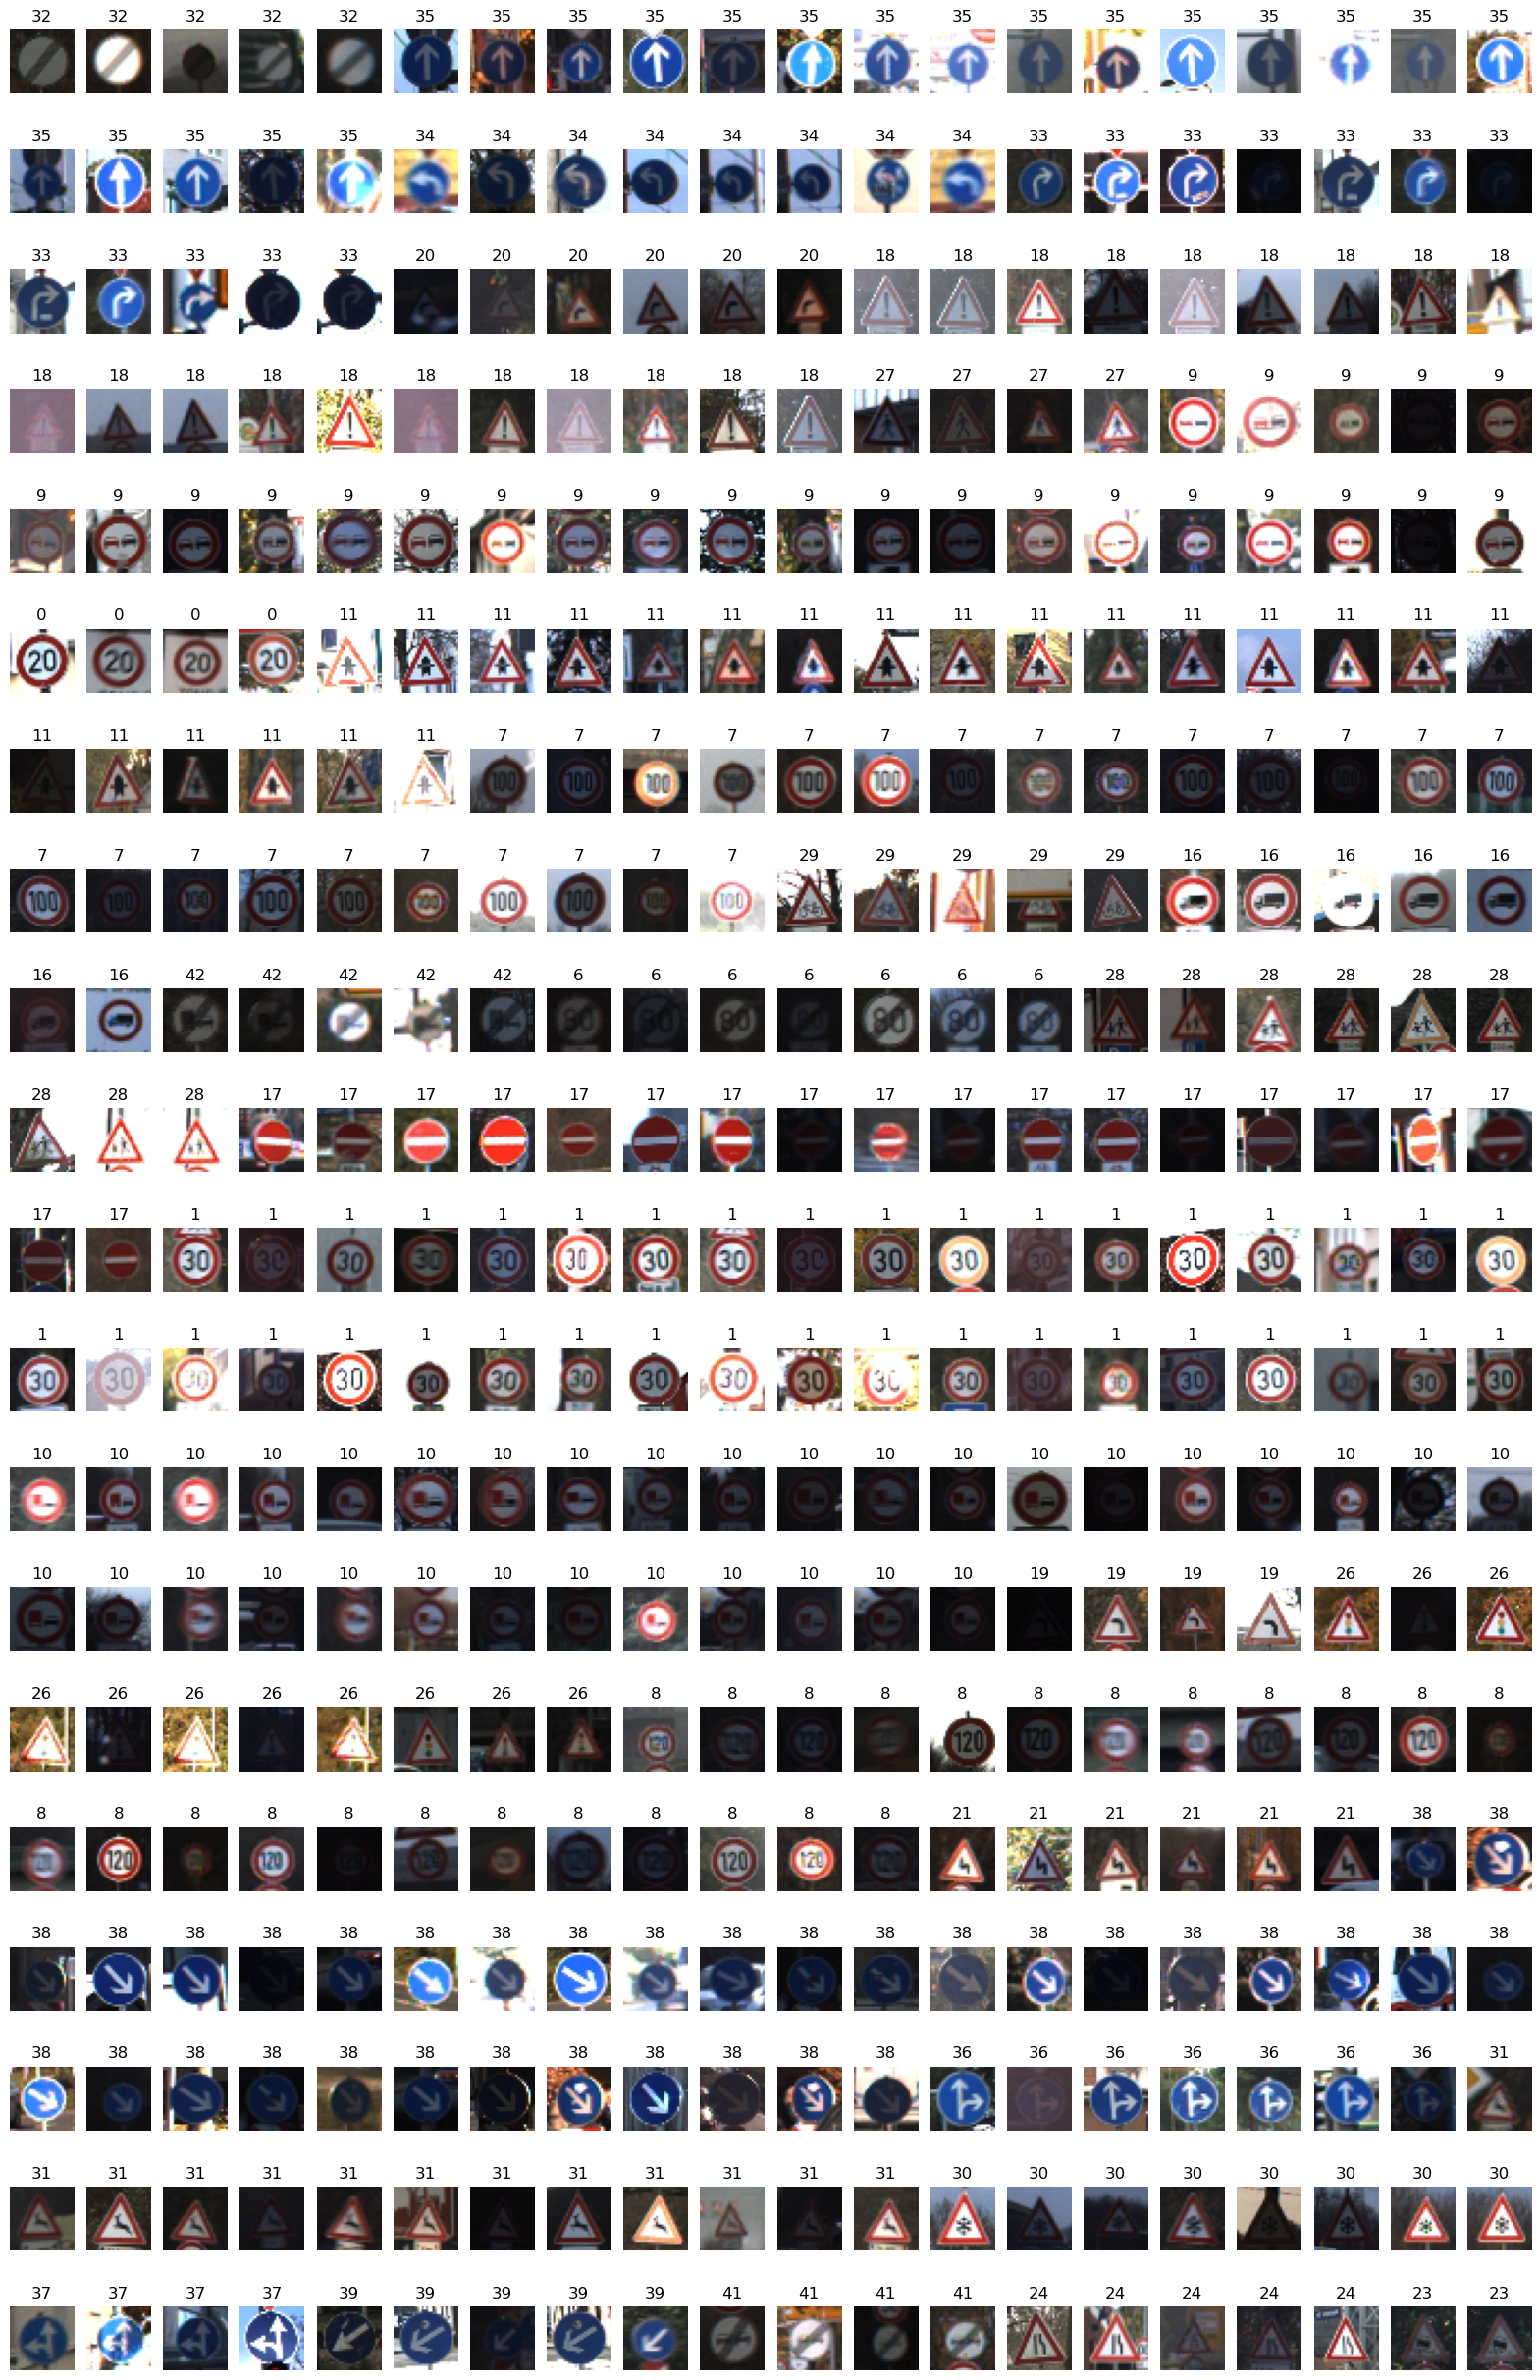

In [24]:
import cv2 as cv

plt.figure(figsize=(20,190))
# for images in loaded_images:
for i in range(400):
    ax = plt.subplot(120, 20, i+1)
    plt.imshow(loaded_images[i])
    plt.title(loaded_labels[i])
    plt.axis("off")


In [4]:
images, labels = loaded_data

In [5]:
num_classes = len(set(labels))
num_classes

43

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=0.4
)

""" Buffed prefetching """

AUTOTUNE = tf.data.AUTOTUNE

In [7]:
""" Standardize the data """
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [44]:
""" 
Basic Keras model 
    -   Keras Sequential model consists of three convolution blocks
    -   tf.keras.layers.Conv2D with a max pooling layer
    -   tf.keras.layers.MaxPool2D in each of them
    -   fully-connected layer tf.keras.layers.Dense; activated by ReLU activation function
    -   standard approach
"""

num_classes = num_classes

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(30, 30, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [45]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 15, 15, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 64)        

In [46]:
epochs = 10
history = model.fit(
    x_train, y_train, 
    validation_data=(x_test, y_test), 
    epochs=epochs
)

Epoch 1/10
666/666 [==============================] - 7s 9ms/step - loss: 1.9261 - accuracy: 0.4644 - val_loss: 0.7552 - val_accuracy: 0.7611
Epoch 2/10
666/666 [==============================] - 6s 9ms/step - loss: 0.4778 - accuracy: 0.8544 - val_loss: 0.2908 - val_accuracy: 0.9240
Epoch 3/10
666/666 [==============================] - 6s 9ms/step - loss: 0.2144 - accuracy: 0.9375 - val_loss: 0.2039 - val_accuracy: 0.9399
Epoch 4/10
666/666 [==============================] - 6s 9ms/step - loss: 0.1237 - accuracy: 0.9649 - val_loss: 0.2405 - val_accuracy: 0.9281
Epoch 5/10
666/666 [==============================] - 6s 9ms/step - loss: 0.0907 - accuracy: 0.9744 - val_loss: 0.1182 - val_accuracy: 0.9645
Epoch 6/10
666/666 [==============================] - 6s 9ms/step - loss: 0.0660 - accuracy: 0.9805 - val_loss: 0.1055 - val_accuracy: 0.9735
Epoch 7/10
666/666 [==============================] - 6s 9ms/step - loss: 0.0510 - accuracy: 0.9850 - val_loss: 0.1079 - val_accuracy: 0.9726
Epoch 

In [41]:
"""Evaluation"""
evaluation = model.evaluate(x_test, y_test, verbose=2)

167/167 - 1s - loss: 0.0864 - accuracy: 0.9799 - 613ms/epoch - 4ms/step


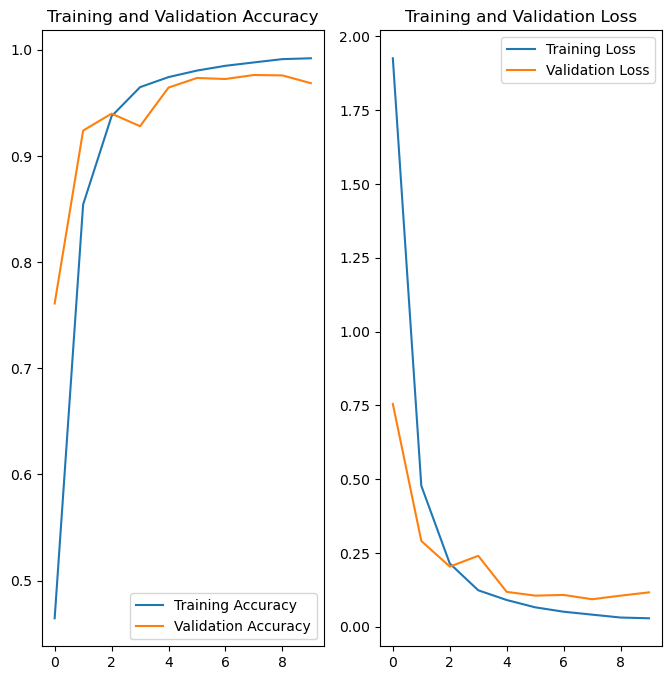

In [51]:
""" Visualize result """
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Overfitting
# Try data augmentation
# generation of new data by applying filters to existing data
# generate believable-looking images
# Here: Not needed for the data set to be large enough
# also augmentation covered by image versions with different 

In [8]:
# Dropout

model_dropout = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(40, 40, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
epochs = 2
history = model_dropout.fit(
    x_train, y_train, 
    validation_data=(x_test, y_test), 
    epochs=epochs
)

Epoch 1/10


2022-11-01 15:35:54.643266: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


500/500 [==============================] - 7s 14ms/step - loss: 2.0561 - accuracy: 0.4210 - val_loss: 0.8315 - val_accuracy: 0.7485
Epoch 2/10
500/500 [==============================] - 8s 15ms/step - loss: 0.5479 - accuracy: 0.8272 - val_loss: 0.2723 - val_accuracy: 0.9242
Epoch 3/10
500/500 [==============================] - 8s 16ms/step - loss: 0.2383 - accuracy: 0.9291 - val_loss: 0.1445 - val_accuracy: 0.9647
Epoch 4/10
500/500 [==============================] - 8s 16ms/step - loss: 0.1401 - accuracy: 0.9576 - val_loss: 0.1003 - val_accuracy: 0.9733
Epoch 5/10
500/500 [==============================] - 8s 17ms/step - loss: 0.1024 - accuracy: 0.9685 - val_loss: 0.0825 - val_accuracy: 0.9794
Epoch 6/10
500/500 [==============================] - 9s 17ms/step - loss: 0.0744 - accuracy: 0.9773 - val_loss: 0.0834 - val_accuracy: 0.9783
Epoch 7/10
500/500 [==============================] - 9s 18ms/step - loss: 0.0604 - accuracy: 0.9815 - val_loss: 0.0644 - val_accuracy: 0.9824
Epoch 8/10

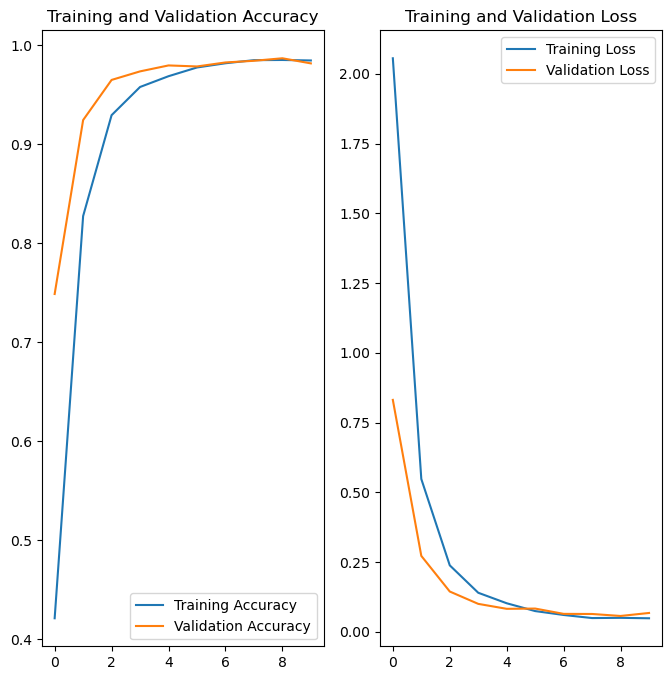

In [10]:
""" Visualize result """
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
model_dropout.evaluate(x_test, y_test)

333/333 [==============================] - 3s 8ms/step - loss: 0.0676 - accuracy: 0.9814


[0.06763054430484772, 0.9814189076423645]

In [29]:
# Test with new images
schild_url = "https://c8.alamy.com/compde/b0916k/verkehrszeichen-30-kmh-hochstgeschwindigkeit-b0916k.jpg"
schild_path = tf.keras.utils.get_file('30_zone', origin=schild_url)

TypeError: '<' not supported between instances of 'int' and 'NoneType'

(-0.5, 39.5, 39.5, -0.5)

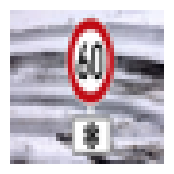

In [25]:
img = keras.utils.load_img(
    schild_path, target_size=(40, 40), interpolation='bicubic'
)

img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

plt.figure(figsize=(2,2))
# ax = plt.subplot(5, 5, i+1)
plt.imshow(img)
plt.axis("off")



In [26]:
predictions = model_dropout(img_array)
print(np.where(predictions == np.max(predictions))[1][0])
print(np.max(predictions))

12
1.0


In [82]:
data_set_test = keras.utils.image_dataset_from_directory(
    '../gtsrb-small-jpeg',
    image_size=(40, 40)
)

Found 841 files belonging to 4 classes.


In [83]:
list_images = list()
for images, labels in data_set_test.take(2):
    list_images.append(images)

(-0.5, 39.5, 39.5, -0.5)

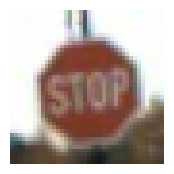

In [84]:
plt.figure(figsize=(2,2))
# ax = plt.subplot(5, 5, i+1)
plt.imshow(list_images[0][0]/255)
plt.axis("off")

In [69]:
nor_layer = layers.Rescaling(1./255)
norm_ds = data_set_test.map(lambda x, y: (nor_layer(x), y))

In [55]:
list_images = list()
for images, labels in norm_ds.take(1):
    list_images.append(images)

In [65]:
# img_array = keras.utils.img_to_array(images[0])
# img_array = tf.expand_dims(img_array, 0)

predictions = model_dropout(images)
print(np.where(predictions == np.max(predictions))[1][0])
print(np.max(predictions))

2
0.42608163


In [63]:
predictions

<tf.Tensor: shape=(1, 43), dtype=float32, numpy=
array([[1.5095945e-07, 2.1943470e-05, 4.2608163e-01, 2.0609149e-01,
        2.5821194e-15, 3.6737400e-01, 2.9575209e-14, 1.1873595e-08,
        4.5471801e-08, 3.3971560e-08, 7.6520635e-15, 6.7976584e-12,
        1.7234432e-17, 2.9739476e-18, 3.6693162e-11, 4.2156702e-19,
        4.3074347e-04, 6.4925157e-29, 3.0966637e-27, 1.0252458e-09,
        5.9923412e-18, 6.4794432e-13, 9.7921958e-34, 9.1094317e-16,
        1.9620356e-12, 1.8256037e-17, 2.2925541e-26, 1.3357275e-16,
        8.4385258e-14, 7.1778622e-10, 5.3142289e-18, 5.5489781e-15,
        1.6193676e-21, 5.0538480e-11, 1.6257904e-16, 3.6927889e-14,
        9.3199412e-24, 2.5062823e-19, 4.9534477e-24, 2.2651842e-22,
        2.9629665e-16, 8.6436075e-16, 2.4337856e-16]], dtype=float32)>

In [70]:
model_dropout.evaluate(norm_ds)

ValueError: in user code:

    File "/Users/duc/miniforge3/lib/python3.10/site-packages/keras/engine/training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "/Users/duc/miniforge3/lib/python3.10/site-packages/keras/engine/training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/duc/miniforge3/lib/python3.10/site-packages/keras/engine/training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "/Users/duc/miniforge3/lib/python3.10/site-packages/keras/engine/training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/duc/miniforge3/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/Users/duc/miniforge3/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/duc/miniforge3/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/duc/miniforge3/lib/python3.10/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/duc/miniforge3/lib/python3.10/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/duc/miniforge3/lib/python3.10/site-packages/keras/backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 43) are incompatible


In [144]:
images, labels = ld('../gtsrb-small-jpeg-Kopie')
print(len(labels))
labels

152


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3]

In [145]:
# x_train, x_test, y_train, y_test = train_test_split(
#     np.array(images), np.array(labels), test_size=0
# )
images = np.array(images) / 255.0
labels = tf.keras.utils.to_categorical(np.array(labels))

In [137]:
images[0].shape

(40, 40, 3)

In [149]:
predictions = model_dropout(tf.expand_dims(images[-1], 0))
print(np.where(predictions == np.max(predictions))[1][0])
print(np.max(predictions))

2
0.44321027
